In [67]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(15,8)})
dateparse1 = lambda x1: pd.datetime.strptime(x1,"%b")
data = pd.read_csv('crude oil dataset/Europe_Brent_Spot_Price_FOB_Monthly.csv',parse_dates=['Date'])
data = data.reindex(index=data.index[::-1])
df = data
data.head()

,Date,Price
422,1987-05-01,18.58
421,1987-06-01,18.86
420,1987-07-01,19.86
419,1987-08-01,18.98
418,1987-09-01,18.31


In [57]:
f = Forecaster(y=data['Price'],
                   current_dates=data['Date'])
f

Forecaster(
    DateStartActuals=1987-05-15T00:00:00.000000000
    DateEndActuals=2022-08-05T00:00:00.000000000
    Freq=W-FRI
    N_actuals=1839
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

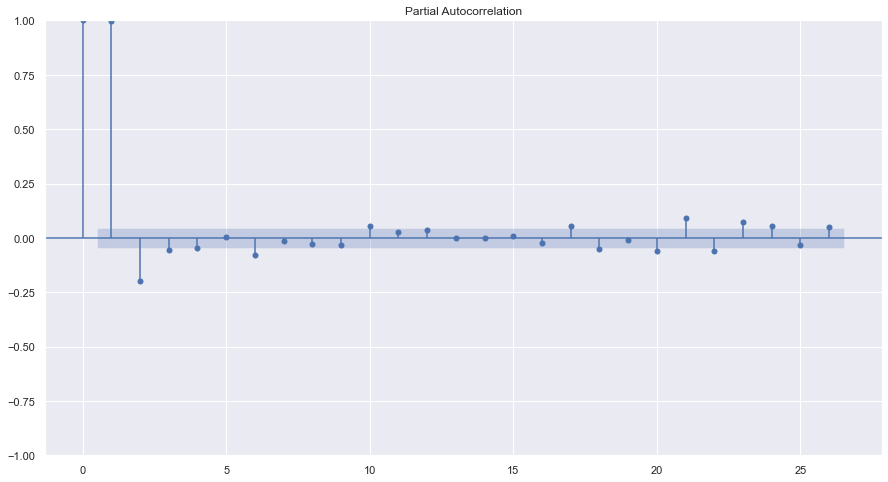

In [58]:
f.plot_pacf(lags=26)
plt.show()


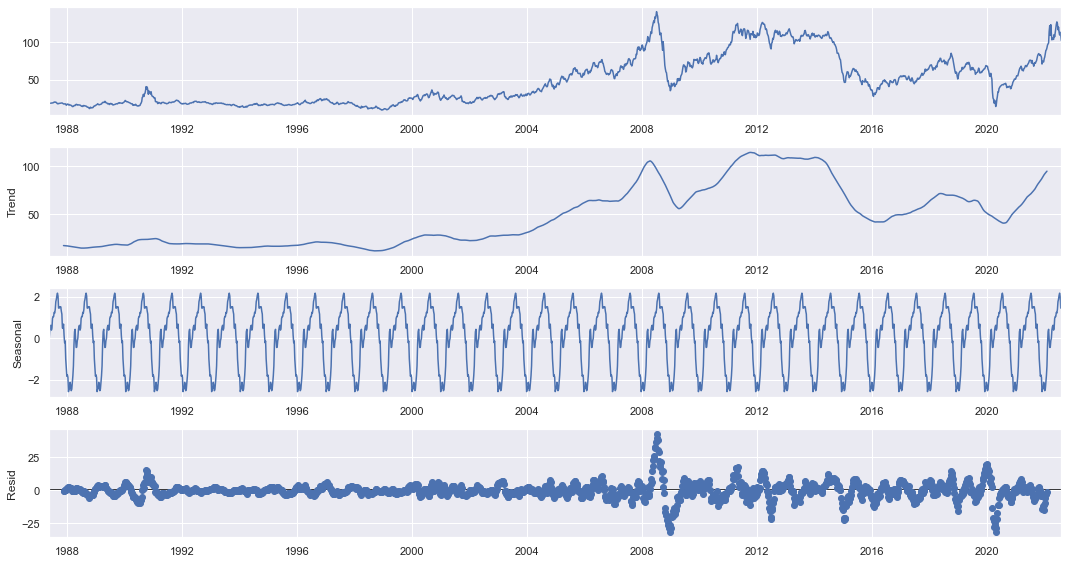

In [59]:
f.seasonal_decompose().plot()
plt.show()

In [60]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)

In [61]:
stat

-1.6296379433228159

In [62]:
pval

0.46768023391998853

In [65]:
f.set_test_length(3)       # 1. 12 observations to test the results
f.generate_future_dates(3) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network
f.manual_forecast(call_me='lstm_default')

58/58 [==============================] - 1s 2ms/step - loss: 0.2598


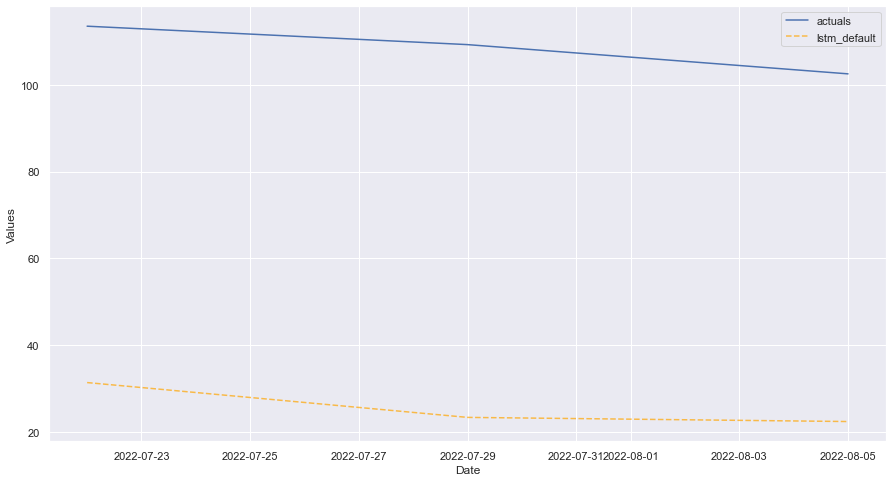

In [66]:
from matplotlib.axis import Axis
#plt.axis([2017, 2024, 50, 150])
a = f.plot_test_set(include_train=False)
